In [1]:
import libpysal 
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
libpysal.version

'3.0.5'

In [3]:
import numpy as np
import geopandas as gpd

In [4]:
p1 = [(0.0, 0.0), (10.0, 0.0), (10.0, 10.0), (0.0, 10.0), (0.0, 0.0)]
p2 = [(10.2, 0.0), (20.0, 0.0), (20.0, 10.0), (10.2, 10.0), (10.2, 0.0)]
p3 = [(5.0, 9.0), (10.0, 15.0), (0.0, 15.0), (5.0,9.0)]
p4 = [ (12.0, 10.0 ), (14.0, 10.0), (14.0, 13.0), (12.0, 13.0)]
p5 = [ (14.0, 13.0), (12.0, 13.0), (13.0, 15.0), (14.0, 13.0)]

from shapely.geometry import Polygon
gs = gpd.GeoSeries([Polygon(polygon) for polygon in [p1,p2,p3,p4, p5]])

In [5]:
gs

0             POLYGON ((0 0, 10 0, 10 10, 0 10, 0 0))
1    POLYGON ((10.2 0, 20 0, 20 10, 10.2 10, 10.2 0))
2                   POLYGON ((5 9, 10 15, 0 15, 5 9))
3       POLYGON ((12 10, 14 10, 14 13, 12 13, 12 10))
4              POLYGON ((14 13, 12 13, 13 15, 14 13))
dtype: object

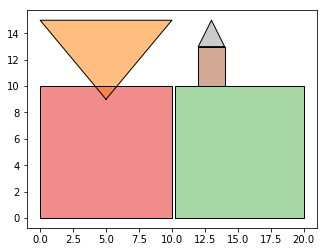

In [6]:
gs.plot()

In [7]:
df = gpd.GeoDataFrame({'geometry':gs})

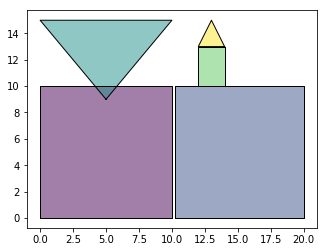

In [8]:
df.plot(edgecolor='k',alpha=0.5)

In [9]:
import libpysal.api as lp

In [10]:
w = lp.Queen.from_dataframe(df)

/Users/serge/Dropbox/p/pysal/src/subpackages/libpysal/libpysal/weights/weights.py:188: UserWarning: There are 3 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
/Users/serge/Dropbox/p/pysal/src/subpackages/libpysal/libpysal/weights/weights.py:189: UserWarning: Island ids: 0, 1, 2
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


In [11]:
w.neighbors

{0: [], 1: [], 2: [], 3: [4], 4: [3]}

In [12]:
import libpysal

In [13]:
w1 = libpysal.weights.util.nonplanar_neighbors(w, df)

In [14]:
w1.neighbors

{0: [2], 1: [3], 2: [0], 3: [4, 1], 4: [3]}

In [15]:
w.neighbors

{0: [], 1: [], 2: [], 3: [4], 4: [3]}

In [16]:
w1.non_planar_joins

defaultdict(list, {0: [2], 1: [3], 2: [0], 3: [1]})

In [17]:
w1.islands

[]

In [18]:
w.weights

{0: [], 1: [], 2: [], 3: [1.0], 4: [1.0]}

In [19]:
w.islands

[0, 1, 2]

## Nested

In [20]:
p0 = [(0.0, 0.0), (10.0, 0.0), (10.0, 10.0), (0.0, 10.0), (0.0, 0.0)]
p1 = [(10.2, 0.0), (20.0, 0.0), (20.0, 10.0), (10.2, 10.0), (10.2, 0.0)]
p2 = [(5.0, 9.0), (10.0, 15.0), (0.0, 15.0), (5.0,9.0)]
p3 = [ (12.0, 10.0 ), (14.0, 10.0), (14.0, 13.0), (12.0, 13.0)]
p4 = [ (14.0, 13.0), (12.0, 13.0), (13.0, 15.0), (14.0, 13.0)]
p5 = [ (14.0, 2.0), (16, 2.0), (16.0, 6.0), (14.0, 6.0)]

from shapely.geometry import Polygon


gs = gpd.GeoSeries([Polygon(p) for p in [p0, p1,p2,p3,p4, p5]])
df = gpd.GeoDataFrame({'geometry':gs})

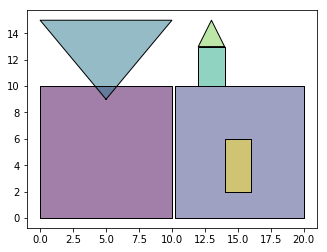

In [21]:
df.plot()

In [22]:
w = lp.Queen.from_dataframe(df)

/Users/serge/Dropbox/p/pysal/src/subpackages/libpysal/libpysal/weights/weights.py:188: UserWarning: There are 4 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
/Users/serge/Dropbox/p/pysal/src/subpackages/libpysal/libpysal/weights/weights.py:189: UserWarning: Island ids: 0, 1, 2, 5
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


In [23]:
w.islands

[0, 1, 2, 5]

In [24]:
islands = w.islands

In [25]:
w.neighbors

{0: [], 1: [], 2: [], 3: [4], 4: [3], 5: []}

In [26]:
w1 = libpysal.weights.util.nonplanar_neighbors(w, df)

In [27]:
w1.non_planar_joins

defaultdict(list, {0: [2], 1: [3, 5], 2: [0], 3: [1], 5: [1]})

In [28]:
w1.islands

[]

In [29]:
w1.neighbors

{0: [2], 1: [3, 5], 2: [0], 3: [4, 1], 4: [3], 5: [1]}

In [30]:
w.neighbors

{0: [], 1: [], 2: [], 3: [4], 4: [3], 5: []}

## True Planar Island

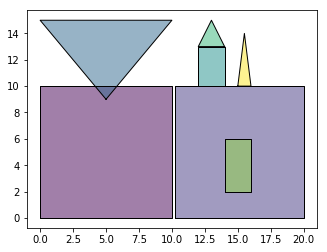

In [31]:
p0 = [(0.0, 0.0), (10.0, 0.0), (10.0, 10.0), (0.0, 10.0), (0.0, 0.0)]
p1 = [(10.2, 0.0), (20.0, 0.0), (20.0, 10.0), (10.2, 10.0), (10.2, 0.0)]
p2 = [(5.0, 9.0), (10.0, 15.0), (0.0, 15.0), (5.0,9.0)]
p3 = [ (12.0, 10.0 ), (14.0, 10.0), (14.0, 13.0), (12.0, 13.0)]
p4 = [ (14.0, 13.0), (12.0, 13.0), (13.0, 15.0), (14.0, 13.0)]
p5 = [ (14.0, 2.0), (16, 2.0), (16.0, 6.0), (14.0, 6.0)]
p6 = [ (15.0, 10.001), (16.0, 10.001), (15.5, 14.0)]
from shapely.geometry import Polygon


gs = gpd.GeoSeries([Polygon(p) for p in [p0, p1,p2,p3,p4, p5, p6]])
df = gpd.GeoDataFrame({'geometry':gs})
df.plot()

In [32]:
w = lp.Queen.from_dataframe(df)

/Users/serge/Dropbox/p/pysal/src/subpackages/libpysal/libpysal/weights/weights.py:188: UserWarning: There are 5 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
/Users/serge/Dropbox/p/pysal/src/subpackages/libpysal/libpysal/weights/weights.py:189: UserWarning: Island ids: 0, 1, 2, 5, 6
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


In [33]:
w1 = libpysal.weights.util.nonplanar_neighbors(w, df)

In [34]:
w1.islands

[]

In [35]:
w1.non_planar_joins

defaultdict(list, {0: [2], 1: [3, 5, 6], 2: [0], 3: [1], 5: [1], 6: [1]})

## Rio Grande do Sul Example

In [36]:
lp.available()

['10740',
 '__pycache__',
 'arcgis',
 'baltim',
 'book',
 'burkitt',
 'calemp',
 'chicago',
 'clearwater',
 'columbus',
 'desmith',
 '__pycache__',
 'geodanet',
 'georgia',
 'juvenile',
 'Line',
 'mexico',
 'nat',
 'networks',
 'newHaven',
 'nyc_bikes',
 'Point',
 'Polygon',
 'Polygon_Holes',
 'rio_grande_do_sul',
 'sacramento2',
 'sids2',
 'snow_maps',
 'south',
 'stl',
 'street_net_pts',
 'taz',
 '__pycache__',
 'tests',
 'tokyo',
 'us_income',
 'virginia',
 'wmat']

In [37]:
lp.explain('rio_grande_do_sul')

{'description': 'Cities of the Brazilian State of Rio Grande do Sul',
 'explanation': ['* 43MUE250GC_SIR.dbf: attribute data (k=2)',
  '* 43MUE250GC_SIR.shp: Polygon shapefile (n=499)',
  '* 43MUE250GC_SIR.shx: spatial index',
  '* 43MUE250GC_SIR.cpg: encoding file ',
  '* 43MUE250GC_SIR.prj: projection information ',
  '* map_RS_BR.dbf: attribute data (k=3)',
  '* map_RS_BR.shp: Polygon shapefile (no lakes) (n=497)',
  '* map_RS_BR.prj: projection information',
  '* map_RS_BR.shx: spatial index',
  'Source: Renan Xavier Cortes <renanxcortes@gmail.com>',
  'Reference: https://github.com/pysal/pysal/issues/889#issuecomment-396693495'],
 'name': 'Rio_Grande_do_Sul'}

In [38]:
df = gpd.read_file(lp.get_path('43MUE250GC_SIR.shp'))

In [39]:
w = lp.Queen.from_dataframe(df)

/Users/serge/Dropbox/p/pysal/src/subpackages/libpysal/libpysal/weights/weights.py:188: UserWarning: There are 30 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
/Users/serge/Dropbox/p/pysal/src/subpackages/libpysal/libpysal/weights/weights.py:189: UserWarning: Island ids: 0, 1, 5, 24, 28, 81, 95, 102, 108, 110, 120, 123, 140, 170, 176, 224, 240, 248, 254, 255, 256, 257, 262, 277, 292, 295, 304, 322, 358, 375
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


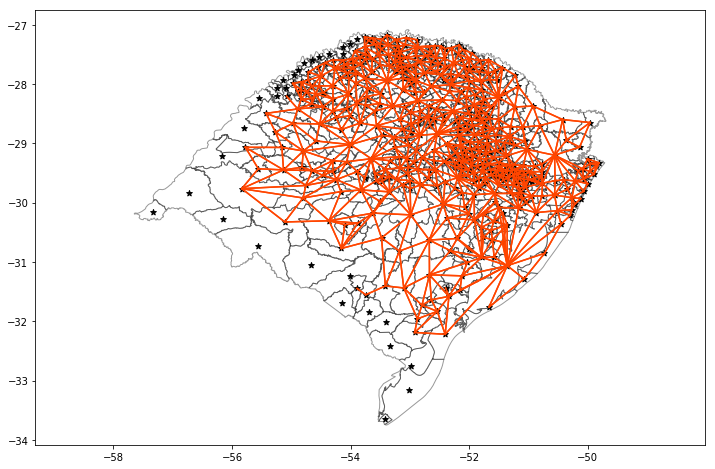

In [40]:
f = plt.figure(figsize=(12,8))
ax = plt.gca()
df.boundary.plot(color='k', ax=ax, alpha=.4)
w.plot(df, edge_kws=dict(linewidth=1.5, color='orangered'), node_kws=dict(marker='*'), ax=ax)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

In [41]:
w1 = libpysal.weights.util.nonplanar_neighbors(w, df)

In [42]:
w1.non_planar_joins

defaultdict(list,
            {0: [20, 176, 270, 295],
             1: [24, 60, 153, 240],
             5: [255, 256, 302, 370],
             6: [170, 262, 375],
             20: [0, 120, 176],
             24: [1, 46, 60, 108, 153, 186, 247],
             27: [102],
             28: [375],
             46: [24],
             54: [254],
             59: [254],
             60: [1, 24, 240],
             81: [295],
             95: [110, 152, 154, 218, 358, 364],
             102: [27, 123, 355, 364],
             103: [248, 277, 322],
             108: [24, 186, 278, 292, 307],
             110: [95, 152, 224, 366],
             120: [20, 176, 240, 241, 247, 249],
             123: [102, 358, 364],
             140: [299, 304, 322],
             152: [95, 110],
             153: [1, 24],
             154: [95],
             168: [304],
             170: [6, 189, 190, 304, 375],
             176: [0, 120, 20],
             186: [24, 108],
             189: [170, 304],
             190: 

In [43]:
w1.islands

[]

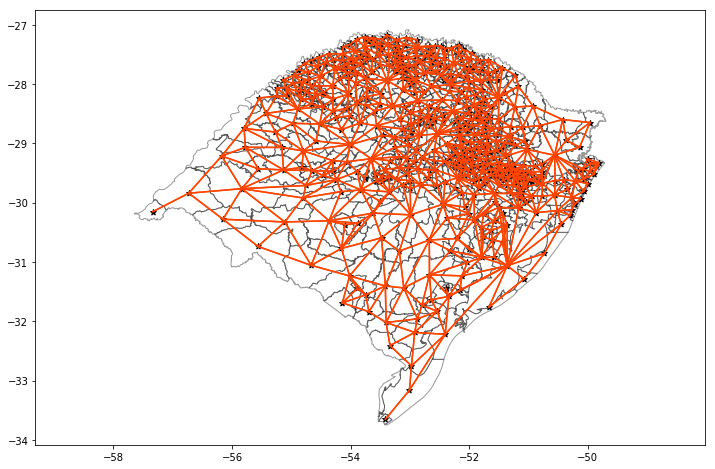

In [44]:
f = plt.figure(figsize=(12,8))
ax = plt.gca()
df.boundary.plot(color='k', ax=ax, alpha=.4)
w1.plot(df, edge_kws=dict(linewidth=1.5, color='orangered'), node_kws=dict(marker='*'), ax=ax)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

### No Lake Polygons

In [49]:
df = gpd.read_file(lp.get_path('map_RS_BR.shp'))
w = lp.Queen.from_dataframe(df)

/Users/serge/Dropbox/p/pysal/src/subpackages/libpysal/libpysal/weights/weights.py:188: UserWarning: There are 29 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
/Users/serge/Dropbox/p/pysal/src/subpackages/libpysal/libpysal/weights/weights.py:189: UserWarning: Island ids: 0, 4, 23, 27, 80, 94, 101, 107, 109, 119, 122, 139, 169, 175, 223, 239, 247, 253, 254, 255, 256, 261, 276, 291, 294, 303, 321, 357, 374
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


In [50]:
w.islands

[0,
 4,
 23,
 27,
 80,
 94,
 101,
 107,
 109,
 119,
 122,
 139,
 169,
 175,
 223,
 239,
 247,
 253,
 254,
 255,
 256,
 261,
 276,
 291,
 294,
 303,
 321,
 357,
 374]

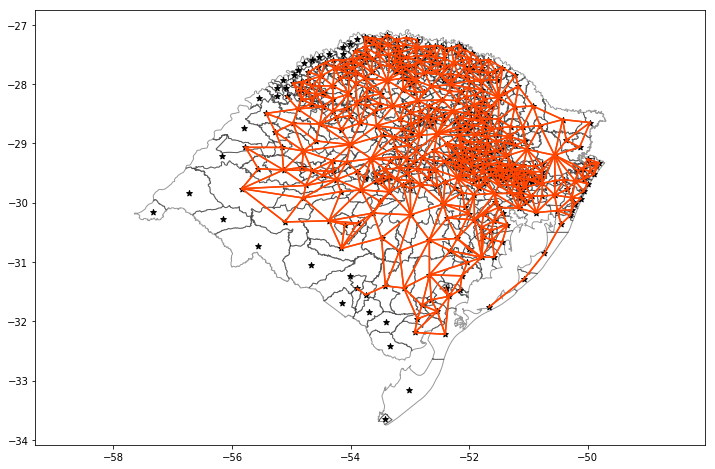

In [46]:
f = plt.figure(figsize=(12,8))
ax = plt.gca()
df.boundary.plot(color='k', ax=ax, alpha=.4)
w.plot(df, edge_kws=dict(linewidth=1.5, color='orangered'), node_kws=dict(marker='*'), ax=ax)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

In [47]:
w1 = libpysal.weights.util.nonplanar_neighbors(w, df)

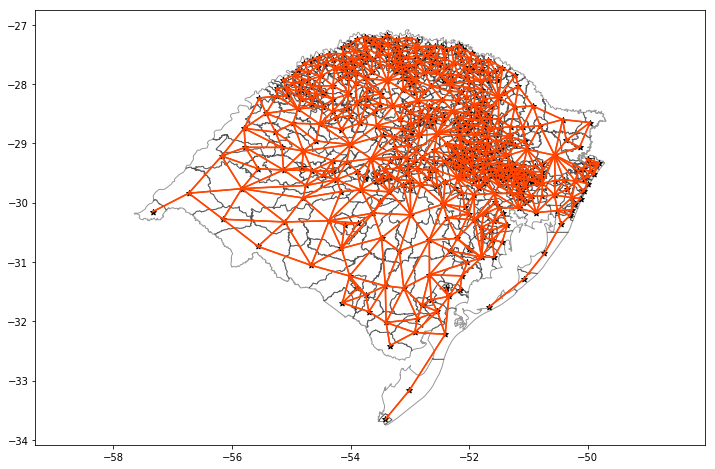

In [48]:
f = plt.figure(figsize=(12,8))
ax = plt.gca()
df.boundary.plot(color='k', ax=ax, alpha=.4)
w1.plot(df, edge_kws=dict(linewidth=1.5, color='orangered'), node_kws=dict(marker='*'), ax=ax)
plt.axes().set_aspect('equal', 'datalim')
plt.show()